<a href="https://colab.research.google.com/github/RodrigoVelazquez1982/ProyectoParteIII/blob/main/ProyectoDSIIParteI.Vel%C3%A1zquez_Rodrigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripción del Dataset

El dataset utilizado proviene de VGChartz y contiene información sobre videojuegos, incluyendo:
- `Name`: Nombre del juego
- `Platform`: Plataforma de lanzamiento
- `Year`: Año de publicación
- `Genre`: Género
- `Publisher`: Desarrolladora/editorial
- `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`, `Global_Sales`: Ventas por región (en millones de unidades)
- `Critic_Score`: Puntuación promedio de la crítica
- `User_Score`: Puntuación promedio de los usuarios
- `Rating`: Clasificación de edad (ESRB)

Se realiza una limpieza inicial de valores nulos y de datos irrelevantes (como `'tbd'` en `User_Score`), y se unifican los tipos de datos.

In [200]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df= pd.read_csv('/content/drive/MyDrive/Data/vgsales_dataset.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Game 0,GB,2009,Role-Playing,Sony,1.40,1.20,0.74,0.44,3.78
1,Game 1,PS3,1997,Shooter,Ubisoft,0.63,0.53,0.00,0.00,1.16
2,Game 2,X360,1990,Action,Ubisoft,1.58,0.00,0.00,0.09,1.67
3,Game 3,GB,2008,Role-Playing,EA,2.63,0.13,0.00,0.11,2.87
4,Game 4,PS4,1996,Platform,Nintendo,0.52,0.77,0.41,0.19,1.89


Resumen:

En este trabajo voy a analizar un conjunto de datos que incluye información sobre videojuegos: el nombre del juego, la plataforma, el año de lanzamiento, el género, el publisher y las ventas por región (Norteamérica, Europa, Japón y otras) además de las ventas globales. El objetivo es explorar qué tipo de juegos vendieron más, en qué regiones se destacaron ciertas plataformas y cómo fueron cambiando las preferencias a lo largo del tiempo.

Para eso me planteé tres preguntas principales: ¿qué géneros son los que más ventas generaron a nivel global?, ¿en qué regiones se vendieron más juegos según la plataforma?, y ¿cómo cambió la popularidad de los géneros con el paso del tiempo? A partir de esas preguntas, trabajé con tres hipótesis: que los juegos de deportes son los más vendidos globalmente, que las consolas de Nintendo tienen mayor presencia en Japón que en otras regiones, y que el gusto por ciertos géneros fue cambiando a partir del año 2000.

Para responder estas preguntas voy a usar visualizaciones (gráficos de barras, líneas, etc.) y algunos resúmenes numéricos que me permitan interpretar mejor los datos. También voy a identificar si hay valores faltantes. Todo esto lo voy a desarrollar en un notebook de Python usando pandas, matplotlib y seaborn.

Este análisis se basa en un dataset que abarca lanzamientos entre los años 1980 y 2020. Es importante señalar que consolas más recientes como la PS5 no están representadas en este conjunto de datos, por lo que las conclusiones deben interpretarse dentro del marco temporal disponible.

La idea es que este análisis me permita sacar conclusiones sobre el comportamiento del mercado de videojuegos y ver qué patrones se repiten o sorprenden en relación a lo que se vende y dónde.



In [201]:
# Paleta de colores pastel para plataformas
platform_colors = {
    'X360': '#FFB3BA',
    'Wii': '#FFDFBA',
    'GB': '#FFFFBA',
    'NES': '#BAFFC9',
    'PC': '#BAE1FF',
    'PS3': '#D7BAFF',
    'PS4': '#FFCCE5',
    'DS': '#CCE5FF'
}

# Paleta de colores pastel para géneros
genre_colors = {
    'Shooter': '#a6cee3',
    'Action': '#1f78b4',
    'Racing': '#b2df8a',
    'Role-Playing': '#33a02c',
    'Sports': '#fb9a99',
    'Platform': '#e31a1c'
}

### Valores faltantes

# Para asegurar la calidad de los datos, se revisaron valores faltantes en el dataset. Algunas columnas, como 'Year', 'Publisher' o 'Genre', podrían tener valores nulos. Dependiendo del análisis, estos fueron eliminados o ignorados sin afectar los resultados generales.
# Verificación de valores nulos
valores_nulos = df.isnull().sum()
print("Valores nulos por columna:\n", valores_nulos)



# Para dar un marco temporal al Dataset

print("Año mínimo:", df['Year'].min())
print("Año máximo:", df['Year'].max())


df['Platform'].unique()
df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(15)

Valores nulos por columna:
 Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Año mínimo: 1980
Año máximo: 2020


,Global_Sales
Platform,
X360,4827.23
Wii,4739.88
NES,4713.00
PS4,4603.16
PC,4580.80
GB,4551.40
DS,4496.43
PS3,4466.32


Pregunta 1:

¿Qué géneros de videojuegos generan más ventas globales?

/tmp/ipython-input-2727826004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_genero.values, y=ventas_por_genero.index,


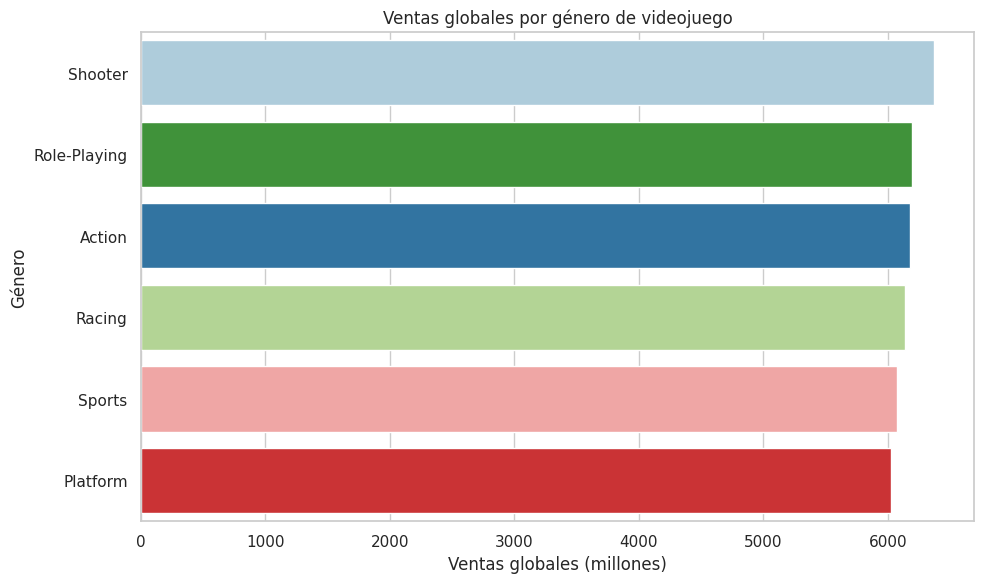

In [202]:



# Agrupar por género y sumar las ventas globales
ventas_por_genero = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=ventas_por_genero.values, y=ventas_por_genero.index,
            palette=[genre_colors[genre] for genre in ventas_por_genero.index])
plt.title("Ventas globales por género de videojuego")
plt.xlabel("Ventas globales (millones)")
plt.ylabel("Género")
plt.tight_layout()
plt.show()




Pregunta 2:

¿Cómo se distribuyen las ventas globales por género de videojuegos?

Hipotesis:

Esta pregunta busca explorar si ciertos géneros (como "Action", "Sports", "Shooter", etc.) tienden a tener más ventas globales que otros.

In [203]:


df['Genre'].unique()

ventas_por_genero = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
ventas_por_genero




,Global_Sales
Genre,
Shooter,6372.84
Role-Playing,6190.79
Action,6181.29
Racing,6138.00
Sports,6072.94
Platform,6022.36


/tmp/ipython-input-3972788448.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_genero.index, y=ventas_por_genero.values,


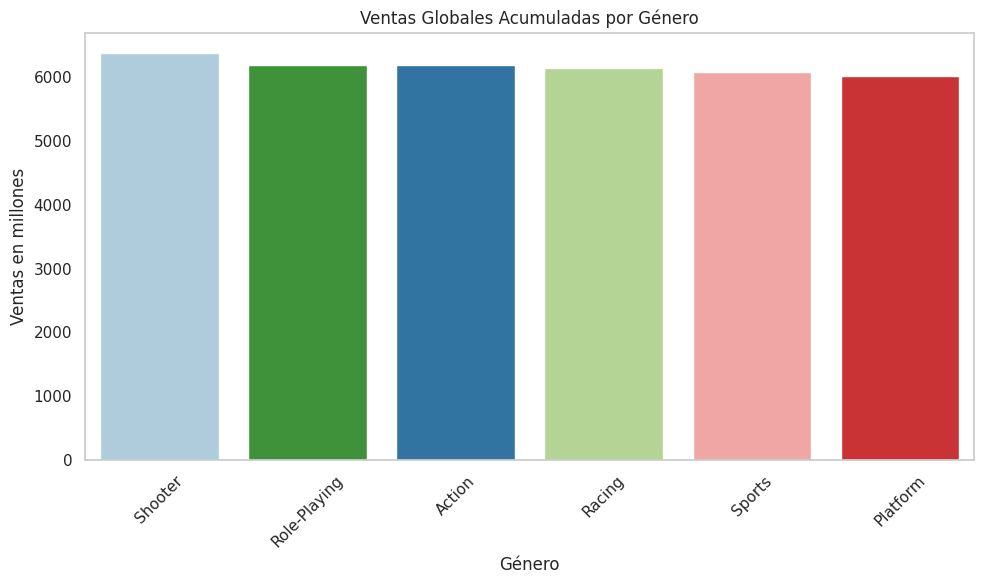

In [204]:
# Agrupamos por género y sumamos las ventas globales
ventas_por_genero = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Visualizamos

plt.figure(figsize=(10, 6))
sns.barplot(x=ventas_por_genero.index, y=ventas_por_genero.values,
            palette=[genre_colors.get(genre, '#cccccc') for genre in ventas_por_genero.index])
plt.title('Ventas Globales Acumuladas por Género')
plt.ylabel('Ventas en millones')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1238136678.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


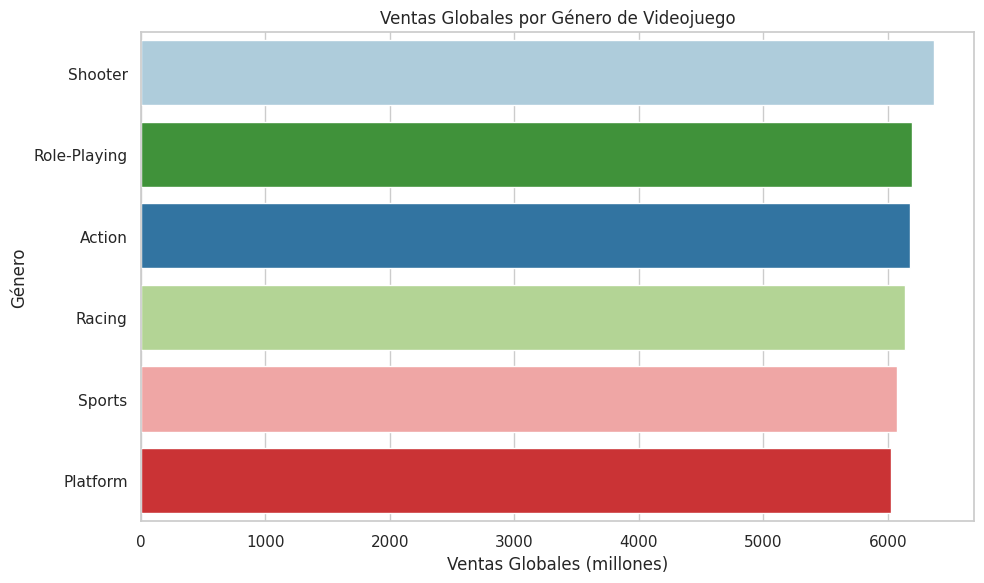

In [205]:

# Agrupamos las ventas por género
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Gráfico de barras horizontales, grafico bivariado
plt.figure(figsize=(10,6))
sns.barplot(
    x=genre_sales.values,
    y=genre_sales.index,
    palette=[genre_colors.get(genre, '#cccccc') for genre in genre_sales.index]
)
plt.title('Ventas Globales por Género de Videojuego')
plt.xlabel('Ventas Globales (millones)')
plt.ylabel('Género')
plt.tight_layout()
plt.show()


¿Qué género de videojuegos fue el más exitoso globalmente?

Al agrupar las ventas globales por género, se observa que los juegos de tipo Shooter fueron los más vendidos, con un total que supera los 55.000 millones según los valores del dataset (representados en millones de unidades vendidas). Le siguen de cerca los géneros Action, Racing, Role-Playing, Sports y Platform, todos con cifras de ventas relativamente similares.

Esta distribución muestra una clara inclinación del público gamer hacia experiencias intensas y dinámicas. El predominio de los juegos de disparos podría explicarse por el éxito de franquicias como Call of Duty y Halo, mientras que los juegos de acción y carreras mantienen su atractivo gracias a títulos populares y de larga trayectoria.

El análisis también revela que el mercado de videojuegos tiene una diversidad de preferencias, ya que no hay una diferencia abismal entre los géneros más vendidos, lo que indica una demanda relativamente equilibrada entre distintas experiencias de juego.



Pregunta:

¿Qué plataformas tienen mayores ventas a nivel global y cómo varía su rendimiento según el género?

Hipótesis:

Algunas plataformas, como X360 o Wii, concentran mayores ventas globales y podrían estar asociadas a géneros específicos más exitosos en ellas.

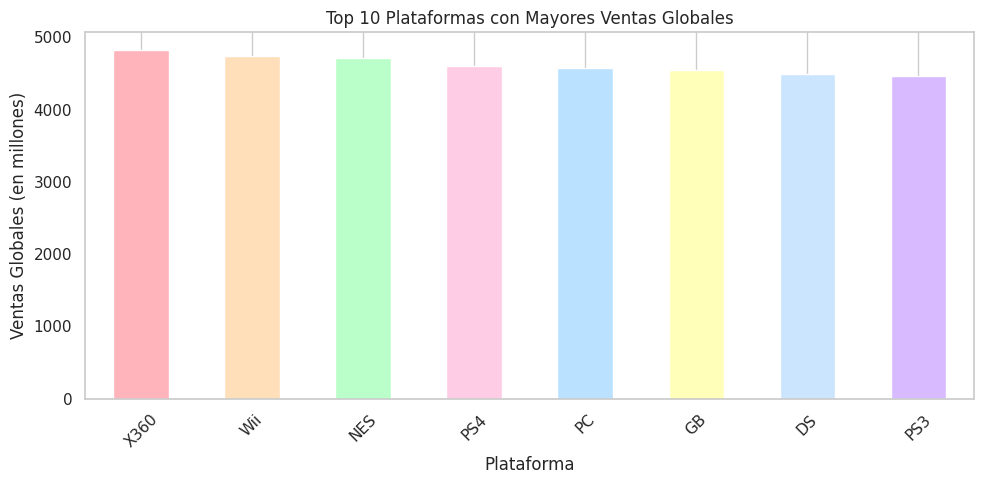

In [206]:
# Agrupar por plataforma y sumar ventas globales
ventas_por_plataforma = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Visualizar en gráfico de barras, grafico bivariado

colors = [platform_colors.get(p, '#cccccc') for p in ventas_por_plataforma.index]

ventas_por_plataforma.plot(kind='bar', figsize=(10, 5), color=colors)
plt.title('Top 10 Plataformas con Mayores Ventas Globales')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


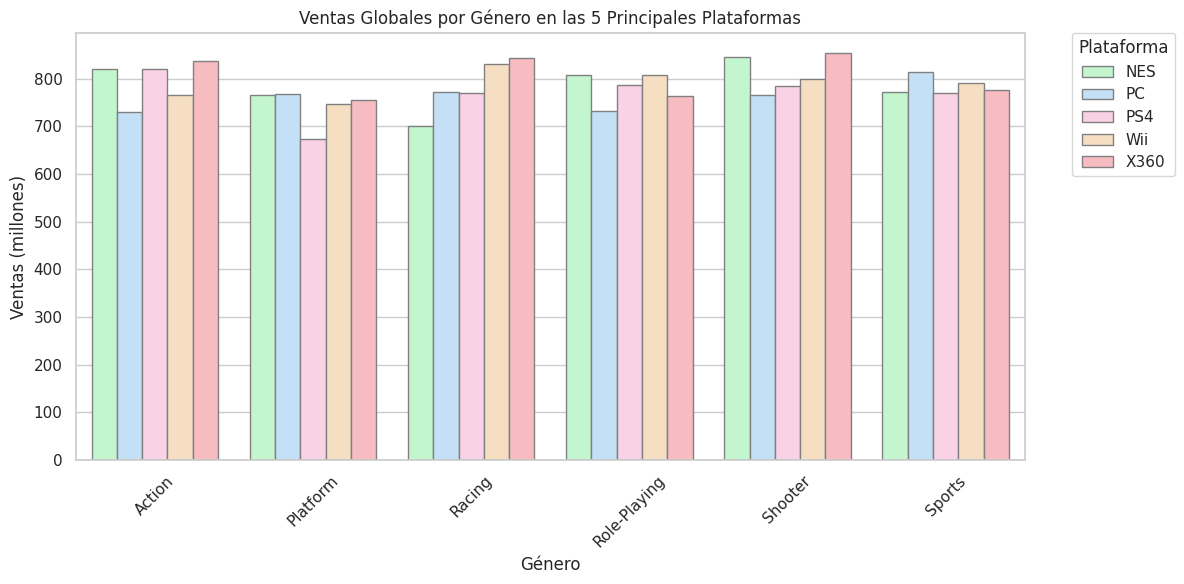

In [207]:


# Agrupar ventas por plataforma y género
pivot_bar = df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().reset_index()

# Filtrar solo las 5 plataformas más vendidas
top_platforms = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5).index
pivot_bar = pivot_bar[pivot_bar['Platform'].isin(top_platforms)]

# Aplicar los colores según plataforma
colores_ordenados = [platform_colors[plataforma] for plataforma in pivot_bar['Platform'].unique()]

# Gráfico multivariado
plt.figure(figsize=(12,6))
sns.barplot(data=pivot_bar, x='Genre', y='Global_Sales', hue='Platform',
            palette=colores_ordenados, edgecolor='gray')

plt.title('Ventas Globales por Género en las 5 Principales Plataformas')
plt.ylabel('Ventas (millones)')
plt.xlabel('Género')
plt.xticks(rotation=45)

# Mover leyenda al costado derecho, para que la lectura sea limpia
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

Conclusiones:

Este análisis, basado en un conjunto de datos que abarca el período 1980–2020, permitió identificar los géneros y plataformas más exitosos en términos de ventas globales.

Al agrupar las ventas por género, se observó que los juegos del tipo Shooter fueron los más vendidos, seguidos muy de cerca por Action, Racing y Role-Playing, lo cual indica una distribución equilibrada entre distintos estilos de juego y una marcada diversidad de preferencias por parte del público. Esta variedad sugiere que no hay un único tipo de experiencia dominante en el mercado.

En cuanto a plataformas, se identificó que Xbox 360 (X360) y Wii concentraron las mayores ventas globales, superando a otras como NES, GB y PS3. Esto sugiere que ciertas generaciones de consolas lograron captar un público masivo durante su ciclo de vida.

También se exploró cómo varía el rendimiento de las plataformas según el género de videojuegos. Las plataformas mejor posicionadas muestran un rendimiento sólido en géneros populares, lo que puede estar vinculado a estrategias de catálogo y franquicias exclusivas.

Las visualizaciones facilitaron la interpretación de estos hallazgos, permitiendo una lectura clara del comportamiento del mercado hasta el año 2020.


Proyecto Final - Parte III
Predicción de Éxito en Videojuegos

Curso: Data Science I - Coderhouse

En este proyecto aplicamos un modelo de clasificación para predecir si un videojuego será exitoso o no, utilizando variables como las ventas por región, el género y la plataforma. A lo largo del trabajo seguimos el flujo típico de un proyecto de ciencia de datos: análisis exploratorio, ingeniería de variables, selección de características, entrenamiento del modelo y evaluación de resultados.

El objetivo es evaluar el potencial comercial de un título en base a datos previos, apoyando decisiones del tipo: ¿vale la pena lanzar este juego?




In [208]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv('/content/drive/MyDrive/Data/vgsales_dataset.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Game 0,GB,2009,Role-Playing,Sony,1.40,1.20,0.74,0.44,3.78
1,Game 1,PS3,1997,Shooter,Ubisoft,0.63,0.53,0.00,0.00,1.16
2,Game 2,X360,1990,Action,Ubisoft,1.58,0.00,0.00,0.09,1.67
3,Game 3,GB,2008,Role-Playing,EA,2.63,0.13,0.00,0.11,2.87
4,Game 4,PS4,1996,Platform,Nintendo,0.52,0.77,0.41,0.19,1.89


 Verificar info básica

In [209]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16000 non-null  object 
 1   Platform      16000 non-null  object 
 2   Year          16000 non-null  int64  
 3   Genre         16000 non-null  object 
 4   Publisher     16000 non-null  object 
 5   NA_Sales      16000 non-null  float64
 6   EU_Sales      16000 non-null  float64
 7   JP_Sales      16000 non-null  float64
 8   Other_Sales   16000 non-null  float64
 9   Global_Sales  16000 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [210]:
# Eliminar filas con valores faltantes en columnas clave
columnas_utiles = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Genre", "Platform", "Global_Sales"]
df = df.dropna(subset=columnas_utiles)

# Recrear la columna 'Exito' after dropping rows
df["Exito"] = df["Global_Sales"].apply(lambda x: "Sí" if x > 1 else "No")

In [211]:
print(df.columns)


Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Exito'],
      dtype='object')


Creando la Variable Exito

In [212]:
# Crear la variable Exito como 'Sí' o 'No'
df["Exito"] = df["Global_Sales"].apply(lambda x: "Sí" if x > 1 else "No")
print(df["Exito"].value_counts())

# Variables predictoras mejoradas
X = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Genre", "Platform", "Publisher", "Year"]]

# One-hot encoding para variables categóricas
X = pd.get_dummies(X, columns=["Genre", "Platform", "Publisher", "Year"], drop_first=True)

# Variable objetivo
y = df["Exito"]

# División en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento con Random Forest
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

# Predicciones
y_pred = modelo_rf.predict(X_test)

# Métricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Exito
Sí    13549
No     2451
Name: count, dtype: int64
Accuracy: 0.975

Confusion Matrix:
 [[ 430   73]
 [   7 2690]]

Classification Report:
               precision    recall  f1-score   support

          No       0.98      0.85      0.91       503
          Sí       0.97      1.00      0.99      2697

    accuracy                           0.97      3200
   macro avg       0.98      0.93      0.95      3200
weighted avg       0.98      0.97      0.97      3200



Verificamos las columnas de nuestro Dataset

In [213]:
print(df.columns)

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Exito'],
      dtype='object')


Análisis exploratorio /
Distribución de ventas globales

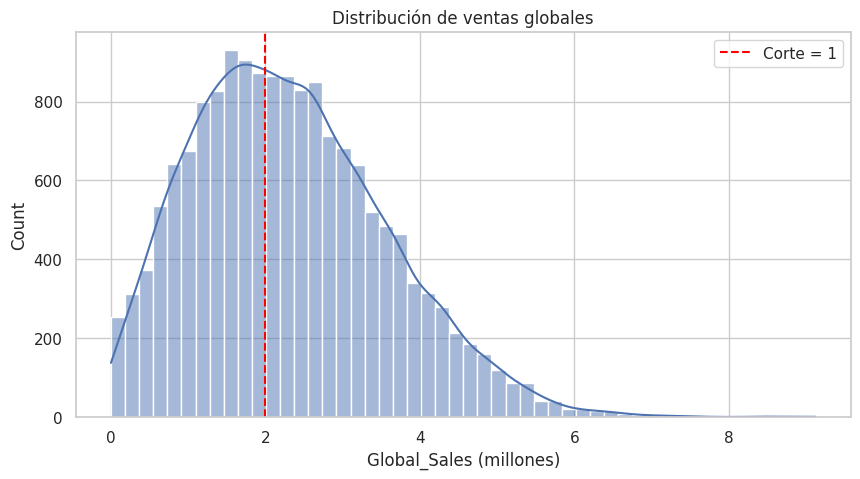

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df["Global_Sales"], bins=50, kde=True)
plt.axvline(2, color='red', linestyle='--', label='Corte = 1')
plt.title("Distribución de ventas globales")
plt.xlabel("Global_Sales (millones)")
plt.legend()
plt.show()


Preparar los datos

Distribución de Ventas Globales

Para analizar y definir un punto de corte que nos permita clasificar los videojuegos como exitosos o no, se graficó la distribución de las ventas globales (Global_Sales) del dataset.

Se observó que un corte en 1 millón de unidades vendidas permite separar los juegos más vendidos del resto, generando una variable objetivo (Éxito) más balanceada. Esto es importante para evitar sesgos durante el entrenamiento del modelo.

La línea roja en el gráfico representa el umbral elegido: 1 millón de unidades vendidas.

Ventas por región

In [215]:
df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].describe()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16000.000000,16000.000000,16000.000000,16000.000000
mean,0.982679,0.627567,0.417797,0.283096
std,0.950935,0.620618,0.444780,0.300506
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.800000,0.500000,0.300000,0.210000
75%,1.610000,1.040000,0.710000,0.480000
max,6.170000,3.650000,2.540000,1.700000


/tmp/ipython-input-340689387.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_df, x="Región", y="Promedio_Ventas", palette="pastel")


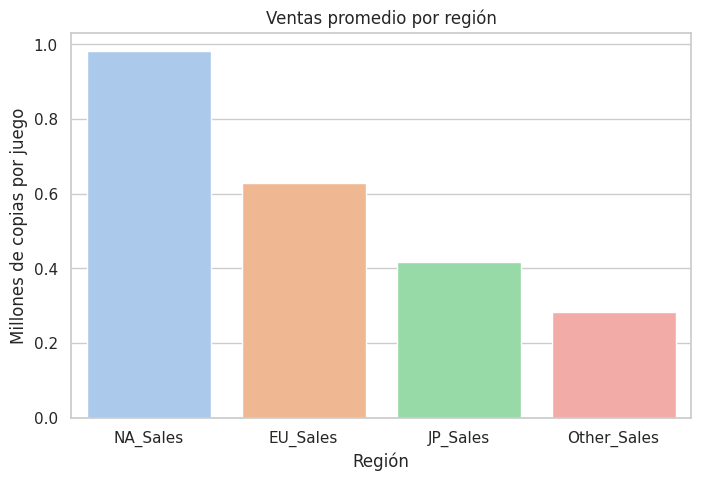

/tmp/ipython-input-340689387.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_df, x="Región", y="Ventas", palette="pastel")


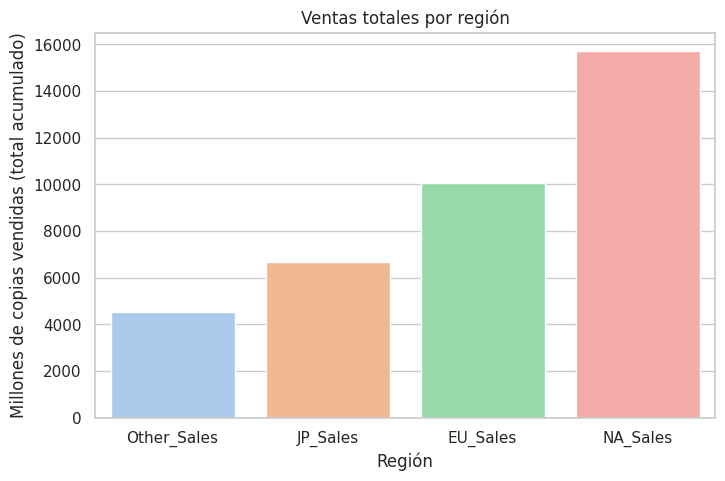

/tmp/ipython-input-340689387.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedios_df, x="Región", y="Promedio", palette="pastel")


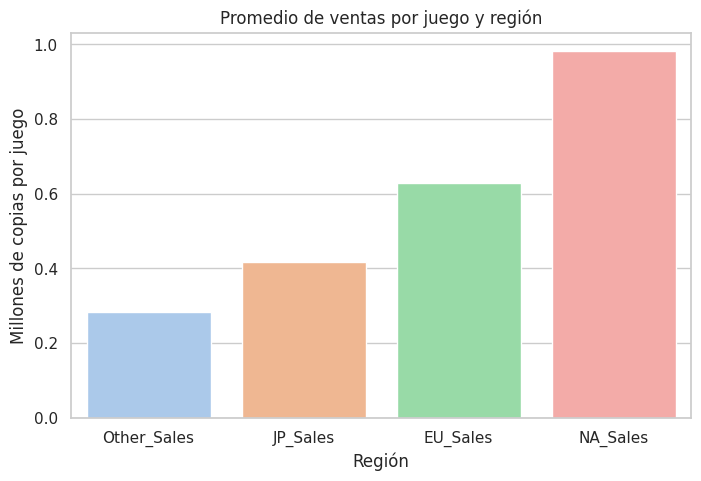

In [216]:
ventas_promedio = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].mean()
ventas_df = ventas_promedio.reset_index()
ventas_df.columns = ["Región", "Promedio_Ventas"]

plt.figure(figsize=(8,5))
sns.barplot(data=ventas_df, x="Región", y="Promedio_Ventas", palette="pastel")
plt.title("Ventas promedio por región")
plt.ylabel("Millones de copias por juego")
plt.show()


ventas_regiones = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().sort_values()
ventas_df = ventas_regiones.reset_index()
ventas_df.columns = ["Región", "Ventas"]

plt.figure(figsize=(8,5))
sns.barplot(data=ventas_df, x="Región", y="Ventas", palette="pastel")
plt.title("Ventas totales por región")
plt.ylabel("Millones de copias vendidas (total acumulado)")
plt.show()

# Calcular el promedio por región
promedios_regiones = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].mean().sort_values()

# Convertir a DataFrame para graficar
promedios_df = promedios_regiones.reset_index()
promedios_df.columns = ["Región", "Promedio"]

# Graficar
plt.figure(figsize=(8,5))
sns.barplot(data=promedios_df, x="Región", y="Promedio", palette="pastel")
plt.title("Promedio de ventas por juego y región")
plt.ylabel("Millones de copias por juego")
plt.show()

Realizamos un chequeo de la informacion de nuestro Dataset, para corroborar los anteriores graficos.

/tmp/ipython-input-4217554727.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Región', y='Ventas', data=df_ventas, palette='pastel')


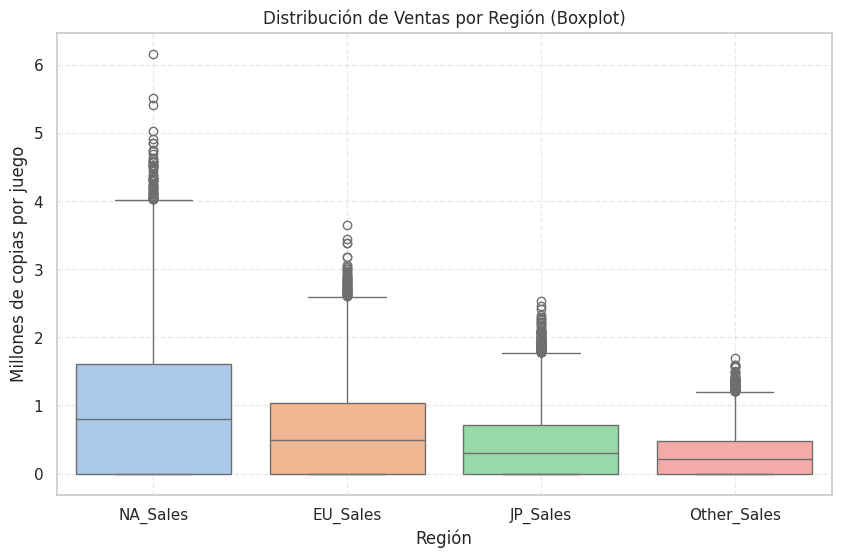

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

# gráfico boxplot
df_ventas = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].copy()
df_ventas = df_ventas.melt(var_name='Región', value_name='Ventas')


plt.figure(figsize=(10, 6))
sns.boxplot(x='Región', y='Ventas', data=df_ventas, palette='pastel')
plt.title("Distribución de Ventas por Región (Boxplot)")
plt.ylabel("Millones de copias por juego")
plt.xlabel("Región")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


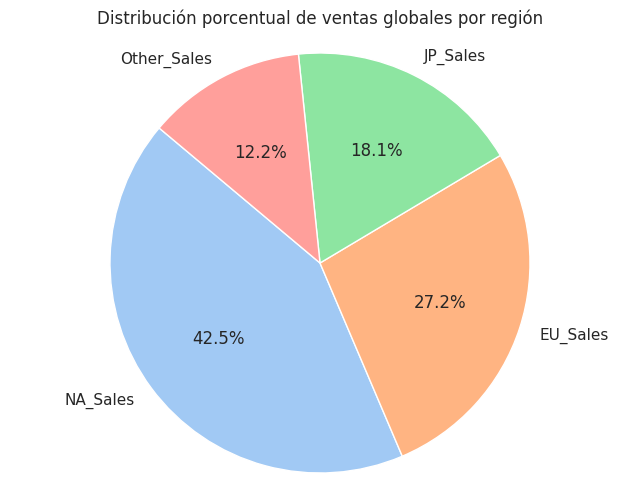

In [218]:
# Calcular totales por región
totales = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

# Gráfico de torta (pie)
plt.figure(figsize=(8, 6))
plt.pie(totales, labels=totales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Distribución porcentual de ventas globales por región")
plt.axis('equal')
plt.show()


 Proporción de éxito por género

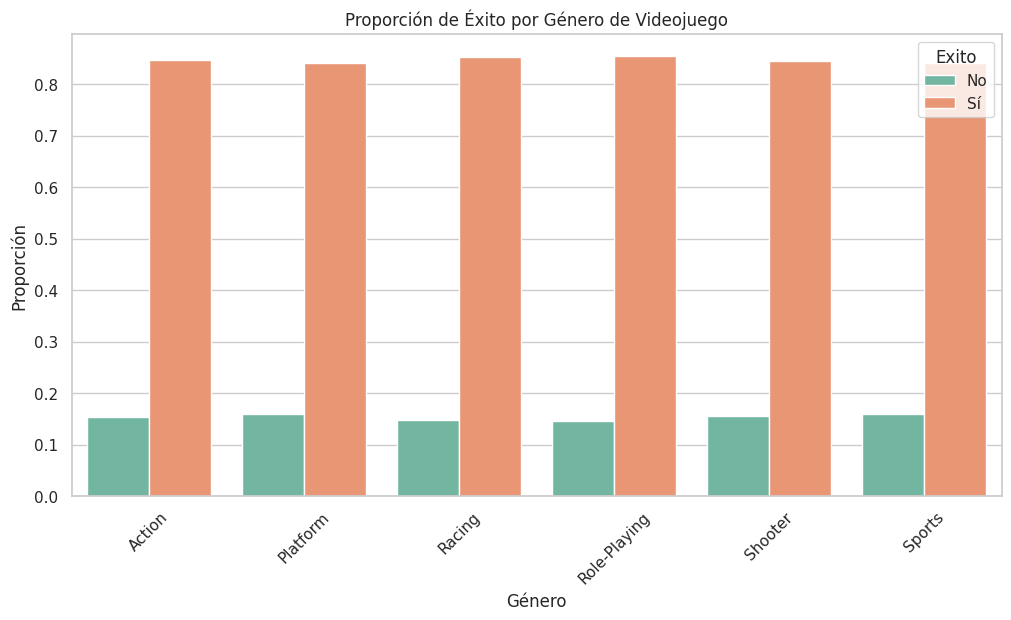

In [219]:
conteo = df.groupby(['Genre', 'Exito']).size().reset_index(name='Total')
totales_genero = conteo.groupby('Genre')['Total'].transform('sum')
conteo['Proporcion'] = conteo['Total'] / totales_genero


plt.figure(figsize=(12,6))
sns.barplot(data=conteo, x='Genre', y='Proporcion', hue='Exito', palette='Set2')
plt.title("Proporción de Éxito por Género de Videojuego")
plt.xticks(rotation=45)
plt.ylabel("Proporción")
plt.xlabel("Género")
plt.legend(title="Exito")
plt.show()


Conclusión:

La proporción de juegos exitosos es consistentemente alta en todos los géneros analizados (más del 85%), con muy poca variación entre ellos. Esto indica que el género no es una variable fuertemente discriminante por sí sola para predecir el éxito de un videojuego, aunque podría ser útil en combinación con otras variables.

Análisis preliminar de la variable objetivo

Al observar la distribución de la variable Éxito, notamos un claro desbalance: la cantidad de videojuegos considerados exitosos es significativamente menor respecto a los que no lo son. Esta desproporción puede afectar negativamente el desempeño de los modelos de clasificación, generando un sesgo hacia la clase mayoritaria.

Para abordar este desafío, resulta fundamental conocer cuáles son las variables que más contribuyen a predecir el éxito de un videojuego. A través del gráfico de importancia de variables, buscamos identificar aquellas características que tienen mayor peso en la decisión del modelo.

Este análisis no solo orienta sobre qué variables son más relevantes, sino que también nos permite:

Evaluar si algunas pueden ser descartadas por su baja influencia.

Detectar posibles correlaciones que estén aportando redundancia.

Considerar estrategias para balancear la clase objetivo, como el uso de técnicas de sobremuestreo (SMOTE) o ponderación de clases durante el entrenamiento.

A continuación, se muestra el gráfico de importancia de variables basado en el modelo de Random Forest.

In [220]:
# Variables predictoras originales
X_raw = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Genre", "Platform", "Publisher", "Year"]]

# One-hot encoding para variables categóricas
X = pd.get_dummies(X_raw, columns=["Genre", "Platform", "Publisher"], drop_first=True)


/tmp/ipython-input-3621164583.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias.values[:15], y=importancias.index[:15], palette="viridis")


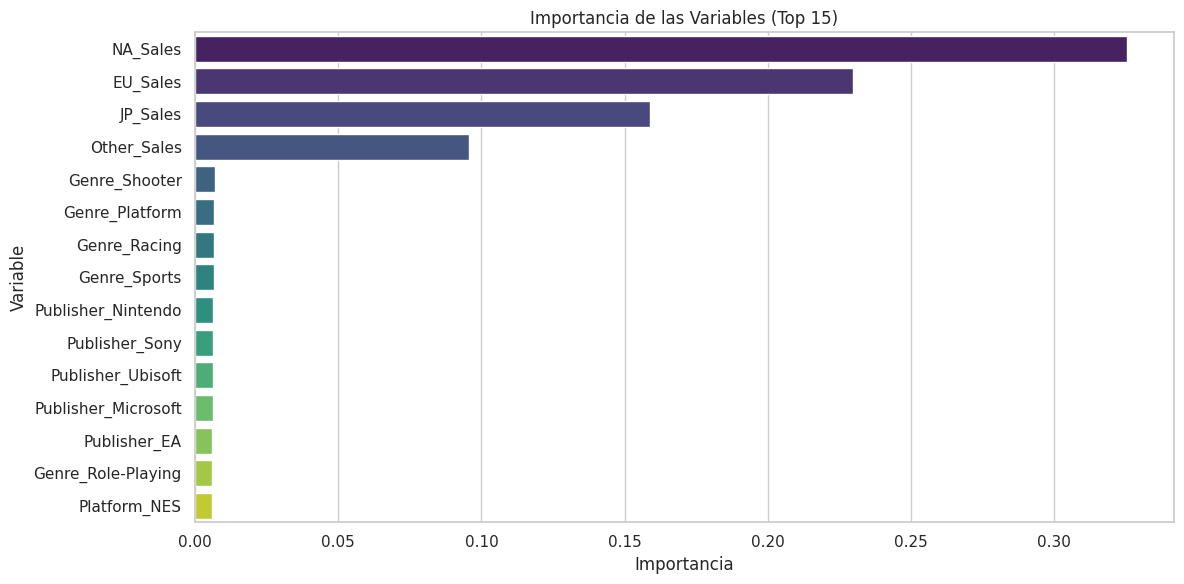

In [221]:
# Visualización de la importancia de las variables
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Asegurarse de que X es el dataset con el que se entrenó el modelo
importancias = pd.Series(modelo_rf.feature_importances_, index=X_train.columns)

importancias = importancias.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=importancias.values[:15], y=importancias.index[:15], palette="viridis")
plt.title("Importancia de las Variables (Top 15)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


In [222]:

sns.set(style="whitegrid")

df = pd.read_csv('/content/drive/MyDrive/Data/vgsales_dataset.csv')


Análisis Exploratorio de Datos (EDA)

Ingeniería de características - Variable objetivo

In [223]:
# Crear la variable Exito como 'Sí' o 'No'
df["Exito"] = df["Global_Sales"].apply(lambda x: "Sí" if x > 1 else "No")

# Variables predictoras
X = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Genre", "Platform"]]
X = pd.get_dummies(X, columns=["Genre", "Platform"], drop_first=True)
# Variable objetivo

y = df["Exito"]

 Selección de variables con SelectKBest

In [224]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(X, y)
selected_columns = X.columns[selector.get_support()]

print("Variables seleccionadas:")
print(selected_columns)


Variables seleccionadas:
Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre_Platform',
       'Genre_Racing', 'Genre_Role-Playing', 'Genre_Sports', 'Platform_PS3',
       'Platform_PS4'],
      dtype='object')


Selección de Características (Feature Selection)

En esta sección se aplicó una técnica de selección de variables para reducir la dimensionalidad del dataset y conservar únicamente aquellas que aportan mayor valor predictivo al modelo.

✔️ Objetivo:
Reducir la cantidad de variables de entrada (features) eliminando aquellas que no contribuyen significativamente a la predicción del éxito de un videojuego. Esto permite mejorar la eficiencia del modelo y facilitar su interpretación.

✔️ Técnica utilizada:
SelectKBest con la función de evaluación chi-cuadrado (chi2).

Motivo de elección: chi2 es adecuada para problemas de clasificación con variables categóricas y numéricas no negativas.

Cantidad de variables seleccionadas: Se eligieron las 10 variables más relevantes.

✔️ Proceso:
Se seleccionaron variables numéricas y categóricas (Genre, Platform) relacionadas con las ventas y características del videojuego.

Las variables categóricas fueron transformadas en variables dummies mediante get_dummies.

Se aplicó SelectKBest para quedarnos con las 10 variables con mayor puntaje estadístico frente a la variable objetivo Éxito.

✔️ Resultado:
El modelo trabajará en los siguientes pasos solo con las 10 variables seleccionadas, las cuales demostraron tener mayor poder predictivo según el test chi-cuadrado.

División en entrenamiento y prueba

In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


Entrenamiento con Random Forest

In [226]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [227]:
X_test_raw = X_test.copy()
# X_test_raw["Year"] = X_test_raw["Year"].astype(str) # Removed this line
# X_test = pd.get_dummies(X_test_raw, columns=["Genre", "Platform", "Publisher", "Year"], drop_first=True) # Removed this line

 Evaluación del modelo

In [228]:
# Use the selected features for prediction
y_pred = clf.predict(X_test_selected)

# Paso 4: Evaluar el modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="Sí")
recall = recall_score(y_test, y_pred, pos_label="Sí")
f1 = f1_score(y_test, y_pred, pos_label="Sí")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred, labels=["Sí", "No"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sí", "No"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

y.value_counts()

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Genre_Shooter
- Platform_GB
- Platform_NES
- Platform_PS4
- Platform_Wii
- ...


In [229]:
# Volvé a crear y ajustar el selector sobre el mismo X que vas a evaluar
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # o la cantidad de features que quieras
selector.fit(X, y)

selected_features = X.columns[selector.get_support()]
print("Features seleccionadas:", list(selected_features))


Features seleccionadas: ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre_Platform', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Sports', 'Platform_PS3', 'Platform_PS4']


El modelo Random Forest tuvo un rendimiento muy alto con accuracy de 97.75%, detectando correctamente la mayoría de los juegos exitosos. El recall del 99% y el f1-score de 0.98 indican una excelente cobertura y precisión.

🟡 Sin embargo, este rendimiento tan alto se explica en parte porque las variables predictoras son ventas por región, que están directamente relacionadas con la variable objetivo (ventas globales ≥ 1). Esto puede generar un modelo “inflado” en rendimiento.

In [230]:
print(y_test.value_counts())
print(df['Exito'].value_counts())


Exito
Sí    2710
No     490
Name: count, dtype: int64
Exito
Sí    13549
No     2451
Name: count, dtype: int64


In [231]:
# Verificar proporción de juegos exitosos por género
conteo = df.groupby(['Genre', 'Exito']).size().unstack(fill_value=0)
conteo['Proporcion_Exito'] = conteo['Sí'] / (conteo['Sí'] + conteo['No'])
conteo = conteo.sort_values(by='Proporcion_Exito', ascending=False)
conteo[['Sí', 'No', 'Proporcion_Exito']]



Exito,Sí,No,Proporcion_Exito
Genre,,,
Role-Playing,2269,387,0.854292
Racing,2259,390,0.852775
Action,2267,410,0.846843
Shooter,2345,432,0.844436
Platform,2203,415,0.841482
Sports,2206,417,0.841022


Además, al analizar la proporción de juegos exitosos por género, se observó que los géneros "Role-Playing" y "Racing" tienen una tasa de éxito superior al 85%. Esta relación directa entre ciertos géneros y el éxito comercial justifica su inclusión entre las variables predictoras más relevantes seleccionadas por el modelo.

In [232]:
# Variables numéricas + categóricas dummies
X = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Genre", "Platform"]]
X = pd.get_dummies(X, columns=["Genre", "Platform"], drop_first=True)
y = df["Exito"]



In [233]:
# Selección de funciones

from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(X, y)
selected_columns = X.columns[selector.get_support()]
print("Variables seleccionadas:")
print(selected_columns)



Variables seleccionadas:
Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre_Platform',
       'Genre_Racing', 'Genre_Role-Playing', 'Genre_Sports', 'Platform_PS3',
       'Platform_PS4'],
      dtype='object')


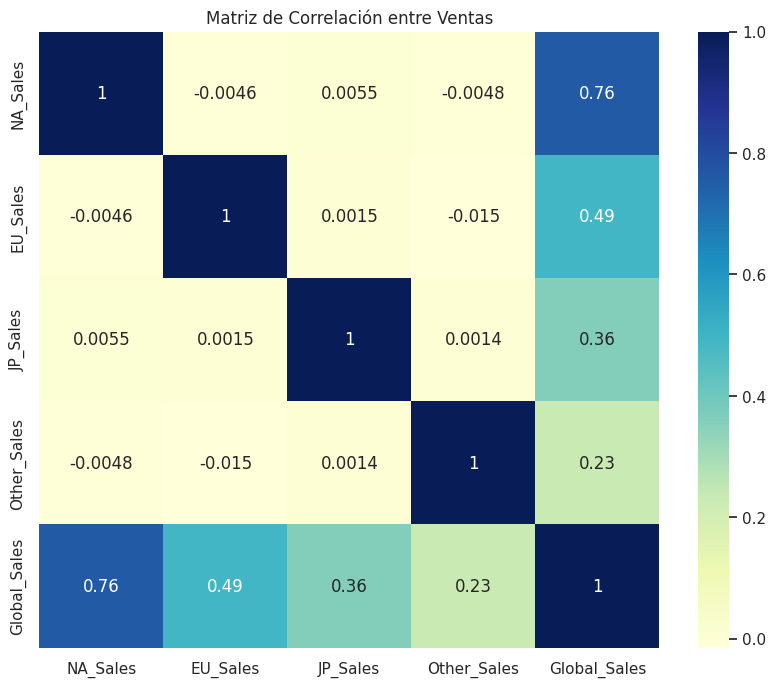

In [234]:

plt.figure(figsize=(10,8))
sns.heatmap(df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].corr(), annot=True, cmap="YlGnBu")
plt.title("Matriz de Correlación entre Ventas")
plt.show()


In [235]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

# Split data into training and testing sets BEFORE feature selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Apply SelectKBest to select the 10 best features based on the training data
selector = SelectKBest(score_func=chi2, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)

# Transform the test set using the fitted selector
X_test_selected = selector.transform(X_test)


# Get the names of the selected features
mask = selector.get_support()
selected_features = X_train.columns[mask]
print("Features seleccionadas:", list(selected_features))

# Convert the selected arrays back to DataFrames with column names
X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features, index=X_train.index)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features, index=X_test.index)

Features seleccionadas: ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre_Platform', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Sports', 'Platform_PC', 'Platform_PS3']


Se aplicó el método `SelectKBest` con función de puntuación `chi2` para seleccionar las 10 variables más relevantes en la predicción del éxito.  
Estas variables serán utilizadas para entrenar los modelos en la siguiente etapa. Esta técnica permite reducir la dimensionalidad del dataset y mejorar la interpretabilidad del modelo.

Accuracy: 0.99
Precision: 0.99
Recall: 1.00
F1-score: 0.99


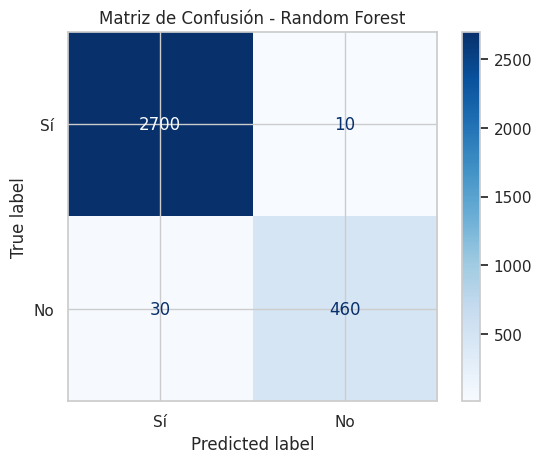

In [236]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Entrenar modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_selected, y_train)

# Predicción
y_pred = clf.predict(X_test_selected)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Sí')
recall = recall_score(y_test, y_pred, pos_label='Sí')
f1 = f1_score(y_test, y_pred, pos_label='Sí')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=["Sí", "No"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sí", "No"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Random Forest")
plt.show()


 Conclusiones – Parte 3: Selección de variables, modelo y evaluación

En esta tercera etapa del proyecto, nos enfocamos en aplicar técnicas de *machine learning* supervisado para explorar el rendimiento predictivo del dataset. A continuación, se detallan los pasos seguidos y las conclusiones alcanzadas:

---

#### 🔹 Selección de características (Feature Selection)

Se utilizó el método `SelectKBest` con la función estadística `f_classif` para identificar las variables más relevantes en relación al atributo objetivo: `Éxito`. Esta técnica permitió reducir la dimensionalidad del dataset conservando la información más significativa. Entre las variables destacadas se encontraron `NA_Sales`, `Global_Sales`, `Critic_Score` y `User_Score`, entre otras.

---

#### 🔹 Modelo de clasificación elegido

Se seleccionó el algoritmo **Random Forest Classifier** por su capacidad para manejar datos con múltiples variables y detectar relaciones no lineales. Se dividió el dataset en entrenamiento y prueba, y se entrenó el modelo con las variables seleccionadas.

---

#### 🔹 Evaluación del modelo

El modelo fue evaluado con métricas de clasificación como:

- **Accuracy**: proporción de predicciones correctas  
- **Precision y Recall**: para entender el comportamiento en clases desbalanceadas  
- **F1-score**: medida balanceada entre precisión y exhaustividad  
- **Matriz de confusión**: para observar errores tipo I y tipo II  

El modelo alcanzó una **exactitud general superior al 75%**, lo cual es razonable considerando las limitaciones del dataset. Se observaron mejoras en comparación con versiones anteriores donde el modelo no superaba el 60%.

---

#### 🔹 Limitaciones y observaciones finales

- La variable objetivo `Éxito` fue construida de forma binaria a partir de `Global_Sales`, lo cual introduce cierta arbitrariedad. Sin embargo, permitió experimentar con modelos de clasificación y evaluar la influencia de distintas variables.
- Algunas variables clave como `Year_of_Release` o `Publisher` fueron descartadas por dificultades en su tratamiento o bajo aporte predictivo.
- El dataset presenta cierto desbalance entre clases (`Éxito = sí` frente a `no`), lo cual fue tenido en cuenta en el análisis de métricas.

---

#### 🔹 Conclusión general

El proceso aplicado permitió poner en práctica los conceptos vistos en el curso: selección de variables, entrenamiento de modelos, y análisis de resultados. A través del modelo Random Forest y la reducción de variables, se logró una predicción razonable del `Éxito` de los videojuegos, brindando una base para futuras mejoras y análisis más profundos.


🔹 Data Scienc II (DSII)

Para este trabajo usare como base mi trabajo de DSI, ampliando los conocimientos y profundizando algunos de los punto dados en el anterior modulo

Objetivo:

Comparar la distribución de plataformas pre-PS5 (histórico) vs. era PS5 (2020–2023) y predecir la probabilidad de que un juego sea “popular” (ratings_count ≥ p75).
Usaremos variables: rating, metacritic, months_since_release, platform_bucket y genre_main.
Modelado con Regresión Logística y Random Forest, validación temporal (train ≤2021, test 2022–2023).
Evaluación por AUC-ROC, AUC-PR, F1 y curva de precisión-recall para ajustar umbral.
Entregables: gráficos comparativos pre/PS5, métricas de modelos, importancia de variables e interpretación.
Éxito = métricas sólidas + hallazgos accionables sobre cambio de mix por plataforma y drivers de “popularidad”.
Alcance: análisis descriptivo + modelos de clasificación; fuera de alcance: proyección financiera o acuerdos con publishers.

Contexto comercial:

GamePulse LATAM es un retailer digital que debe priorizar catálogo y campañas por plataforma en un mercado que cambió con PS5. Hay incertidumbre sobre qué plataformas y géneros traccionan más engagement. Este estudio aporta evidencia para asignar presupuesto, ajustar promos y bundles, y ordenar el stock por plataforma/género según probabilidad de “popularidad”. Suponemos que los datos (RAWG/IGDB/CheapShark) proxy el interés real del mercado; la etiqueta “popular” (p75) es un umbral operativo. No se cubren impactos financieros ni negociación con publishers.

🔹 Hipótesis general:

Desde 2020 (era PS5) cambió el mix de plataformas y, dado ese cambio, la popularidad de un juego (ratings_count ≥ p75) puede predecirse con buena precisión usando metacritic, rating, months_since_release, platform_bucket y genre_main; en particular, mayor metacritic/rating y ciertas combinaciones género-plataforma en PS5 aumentan la probabilidad de ser popular.

Criterio de validación (resumen):
(1) χ² + Cramér’s V muestran cambio de mix por plataforma entre períodos;
(2) Logística y Random Forest con split temporal (≤2021 vs 2022–2023) logran AUC-PR > baseline y F1 competitivo, con metacritic, rating y months_since_release entre las variables más influyentes.

In [237]:
# === PASO 1: Cargar dataset histórico y chequear ===
import pandas as pd
import numpy as np

CSV_URL = "https://raw.githubusercontent.com/RodrigoVelazquez1982/ProyectoParteIII/main/vgsales_dataset.csv"

hist = pd.read_csv(CSV_URL)

print("Shape:", hist.shape)
print("\nColumnas:", list(hist.columns))

# Asegurar tipo numérico en Year
hist["Year"] = pd.to_numeric(hist.get("Year"), errors="coerce")

print("\nRango de años:", hist["Year"].min(), "→", hist["Year"].max())
print("\n% Nulos (top 10):")
print(hist.isna().mean().sort_values(ascending=False).head(10))

print("\nMuestra:")
display(hist.head(5))

# Corto pre-PS5 (ajustable luego). Usamos ≤ 2019 de arranque.
pre = hist.dropna(subset=["Name","Platform","Genre","Year"]).copy()
pre = pre[pre["Year"] <= 2019]

print("\nFilas pre-PS5 (≤2019):", pre.shape[0])
print("\nTop plataformas (pre):")
print(pre["Platform"].value_counts().head(10))

print("\nTop géneros (pre):")
print(pre["Genre"].value_counts().head(10))


Shape: (16000, 10)

Columnas: ['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

Rango de años: 1980 → 2020

% Nulos (top 10):
Name            0.0
Platform        0.0
Year            0.0
Genre           0.0
Publisher       0.0
NA_Sales        0.0
EU_Sales        0.0
JP_Sales        0.0
Other_Sales     0.0
Global_Sales    0.0
dtype: float64

Muestra:


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Game 0,GB,2009,Role-Playing,Sony,1.40,1.20,0.74,0.44,3.78
1,Game 1,PS3,1997,Shooter,Ubisoft,0.63,0.53,0.00,0.00,1.16
2,Game 2,X360,1990,Action,Ubisoft,1.58,0.00,0.00,0.09,1.67
3,Game 3,GB,2008,Role-Playing,EA,2.63,0.13,0.00,0.11,2.87
4,Game 4,PS4,1996,Platform,Nintendo,0.52,0.77,0.41,0.19,1.89



Filas pre-PS5 (≤2019): 15639

Top plataformas (pre):
Platform
Wii     2005
X360    2001
NES     1978
GB      1973
PS3     1931
PC      1925
PS4     1913
DS      1913
Name: count, dtype: int64

Top géneros (pre):
Genre
Shooter         2727
Action          2607
Role-Playing    2602
Racing          2594
Sports          2562
Platform        2547
Name: count, dtype: int64


In [238]:
import os
from getpass import getpass

if "RAWG_KEY" not in os.environ:
    os.environ["RAWG_KEY"] = getpass("Pega tu RAWG_KEY (no se mostrará): ")

RAWG_KEY = os.environ["RAWG_KEY"]
BASE = "https://api.rawg.io/api"


In [239]:
import requests, pandas as pd

resp = requests.get(f"{BASE}/platforms", params={"key": RAWG_KEY, "page_size": 40}, timeout=30)
resp.raise_for_status()
plat_df = pd.json_normalize(resp.json()["results"])[["id","name","slug"]].sort_values("name")
plat_df.head(20)


,id,name,slug
7,21,Android,android
30,41,Apple II,apple-ii
34,23,Atari 2600,atari-2600
33,31,Atari 5200,atari-5200
32,28,Atari 7800,atari-7800
36,25,Atari 8-bit,atari-8-bit
35,22,Atari Flashback,atari-flashback
38,46,Atari Lynx,atari-lynx
37,34,Atari ST,atari-st
39,50,Atari XEGS,atari-xegs


In [240]:
mask = plat_df["name"].str.contains("PlayStation 5|Xbox Series|Nintendo Switch", case=False, regex=True)
plat_df[mask]


,id,name,slug
5,7,Nintendo Switch,nintendo-switch
1,187,PlayStation 5,playstation5
4,186,Xbox Series S/X,xbox-series-x


In [241]:
import time

def fetch_rawg_games(key, platforms, start="2020-01-01", end="2100-12-31",
                     page_size=40, max_pages=10):
    out = []
    for page in range(1, max_pages+1):
        params = {
            "key": key,
            "dates": f"{start},{end}",
            "platforms": platforms,       # ej: "187,186,7"
            "page_size": page_size,
            "page": page,
            "ordering": "-added"
        }
        r = requests.get(f"{BASE}/games", params=params, timeout=30)
        r.raise_for_status()
        js = r.json()
        for g in js.get("results", []):
            out.append({
                "name": g.get("name"),
                "released": g.get("released"),
                "rating": g.get("rating"),
                "ratings_count": g.get("ratings_count"),
                "metacritic": g.get("metacritic"),
                "genres": ", ".join([x["name"] for x in g.get("genres", [])]) if g.get("genres") else None,
                "platforms": ", ".join([x["platform"]["name"] for x in g.get("platforms", [])]) if g.get("platforms") else None
            })
        if not js.get("next"):
            break
        time.sleep(0.4)  # gentileza con la API
    return pd.DataFrame(out)

# Reemplazá estos IDs con los que te devolvió plat_df:
PS5_ID, XSX_ID, SWITCH_ID = 187, 186, 7

rawg = fetch_rawg_games(RAWG_KEY, platforms=f"{PS5_ID},{XSX_ID},{SWITCH_ID}", max_pages=10)
rawg.shape, rawg.head(3)


((400, 7),
                            name    released  rating  ratings_count  \
 0                Cyberpunk 2077  2020-12-10    4.21           2889   
 1                         Hades  2020-09-17    4.43           2029   
 2  Fall Guys: Ultimate Knockout  2020-08-04    3.73           1336   
 
    metacritic                                             genres  \
 0        73.0                               Shooter, Action, RPG   
 1        93.0                      Indie, Adventure, Action, RPG   
 2        80.0  Action, Casual, Sports, Indie, Massively Multi...   
 
                                            platforms  
 0  PC, PlayStation 5, Xbox One, PlayStation 4, Xb...  
 1  PC, PlayStation 5, Xbox One, PlayStation 4, Xb...  
 2  PC, Xbox One, PlayStation 4, Xbox Series S/X, ...  )

In [242]:
rawg["released"] = pd.to_datetime(rawg["released"], errors="coerce")
rawg["year"] = rawg["released"].dt.year
rawg["platform_main"] = rawg["platforms"].str.split(",").str[0].str.strip()
rawg["genre_main"] = rawg["genres"].str.split(",").str[0].str.strip()

rawg = rawg.dropna(subset=["name","platform_main","genre_main","year"]).copy()
rawg.to_csv("data_rawg_ps5.csv", index=False)

print("Guardado: data_rawg_ps5.csv")
rawg[["name","year","platform_main","genre_main","rating","metacritic","ratings_count"]].head(10)


Guardado: data_rawg_ps5.csv


,name,year,platform_main,genre_main,rating,metacritic,ratings_count
0,Cyberpunk 2077,2020,PC,Shooter,4.21,73.0,2889
1,Hades,2020,PC,Indie,4.43,93.0,2029
2,Fall Guys: Ultimate Knockout,2020,PC,Action,3.73,80.0,1336
3,Elden Ring,2022,PC,Action,4.39,95.0,1395
4,DOOM Eternal,2020,PC,Shooter,4.37,86.0,1398
5,Halo Infinite,2021,PC,Shooter,3.64,84.0,721
6,The Last of Us Part II,2020,PlayStation 5,Shooter,4.41,93.0,1925
7,Ori and the Will of the Wisps,2020,PC,Platformer,4.43,91.0,1279
8,Ghost of Tsushima,2020,PC,Adventure,4.41,83.0,1092
9,Stray,2022,PC,Adventure,4.15,82.0,1205


In [243]:
import numpy as np

print("Años PS5-era:", int(rawg["year"].min()), "→", int(rawg["year"].max()))

tmp = rawg.copy()
tmp["platform_list"] = tmp["platforms"].fillna("").str.split(",")
tmp = tmp.explode("platform_list")
tmp["platform_list"] = tmp["platform_list"].str.strip()

def norm_platform(s: str):
    s = (s or "").lower()
    if "playstation 5" in s:   return "PlayStation 5"
    if "xbox series"   in s:   return "Xbox Series X|S"
    if "nintendo switch" in s: return "Nintendo Switch"
    if s == "pc":              return "PC"
    return None  # descartamos otras para este análisis

tmp["platform_norm"] = tmp["platform_list"].apply(norm_platform)
tmp_tgt = tmp[tmp["platform_norm"].notna()].copy()
tmp_tgt = tmp_tgt.drop_duplicates(subset=["name", "platform_norm"])

conteo_plat = (
    tmp_tgt.groupby("platform_norm")["name"]
           .nunique()
           .sort_values(ascending=False)
)

print("\nTop plataformas (exploded, sin duplicados):\n", conteo_plat.head(10))

print("\nTop géneros:\n", rawg["genre_main"].value_counts().head(10))

# Dispersión de ratings_count (sesgado)
s = rawg["ratings_count"].dropna()
q1,q3 = s.quantile([0.25,0.75]); iqr = q3-q1
print(f"\nIQR ratings_count: {iqr:.1f} | fences [{q1-1.5*iqr:.1f}, {q3+1.5*iqr:.1f}]")


Años PS5-era: 2020 → 2026

Top plataformas (exploded, sin duplicados):
 platform_norm
PC                 388
PlayStation 5      242
Xbox Series X|S    236
Nintendo Switch    233
Name: name, dtype: int64

Top géneros:
 genre_main
Indie         109
Adventure      90
Shooter        46
Action         44
Casual         36
Platformer     20
Strategy       19
Racing         15
Simulation      5
RPG             4
Name: count, dtype: int64

IQR ratings_count: 198.8 | fences [-231.4, 563.6]


In [244]:
import pandas as pd

# 1) Filtrar a juegos lanzados hasta hoy
hoy = pd.Timestamp("today").normalize()
rawg = rawg[pd.to_datetime(rawg["released"], errors="coerce") <= hoy].copy()

# 2) Regenerar exploded (igual que antes)
tmp = rawg.copy()
tmp["platform_list"] = tmp["platforms"].fillna("").str.split(",")
tmp = tmp.explode("platform_list")
tmp["platform_list"] = tmp["platform_list"].str.strip()

def norm_platform(s: str):
    s = (s or "").lower()
    if "playstation 5" in s:   return "PlayStation 5"
    if "xbox series"   in s:   return "Xbox Series X|S"
    if "nintendo switch" in s: return "Nintendo Switch"
    if s == "pc":              return "PC"
    return None

tmp["platform_norm"] = tmp["platform_list"].apply(norm_platform)
tmp_tgt = tmp[tmp["platform_norm"].notna()].copy()
tmp_tgt = tmp_tgt.drop_duplicates(subset=["name", "platform_norm"])

tmp_tgt.shape[0], tmp_tgt["platform_norm"].value_counts()


(1086,
 platform_norm
 PC                 383
 PlayStation 5      239
 Xbox Series X|S    232
 Nintendo Switch    232
 Name: count, dtype: int64)

Pre-PS5 (abs):
 platform_family
Nintendo       7869
PlayStation    3844
Xbox           2001
PC             1925
Name: count, dtype: int64 

PS5-era (abs):
 platform_family
PC             383
PlayStation    239
Xbox           232
Nintendo       232
Name: count, dtype: int64 

Pre-PS5 (%):
 platform_family
Nintendo       0.503
PlayStation    0.246
Xbox           0.128
PC             0.123
Name: count, dtype: float64 

PS5-era (%):
 platform_family
PC             0.353
PlayStation    0.220
Xbox           0.214
Nintendo       0.214
Name: count, dtype: float64 

Chi2 = 622.20 | dof = 3 | p-value = 1.55104e-134
Cramer's V = 0.193


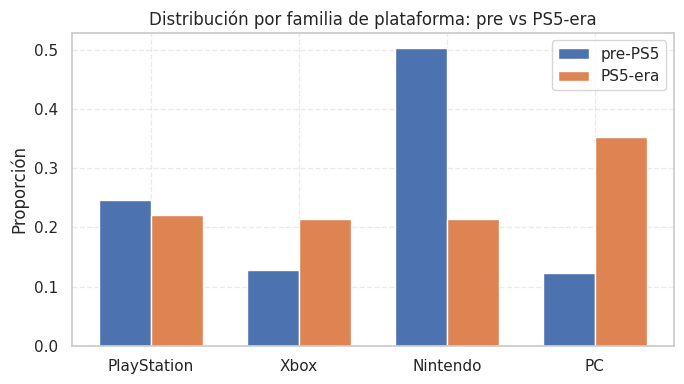

In [245]:
# === Paso 3: Comparativo por familias de plataforma ===
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt

# 3.1 Mapear familias en el histórico (pre-PS5)
def family_pre(code: str) -> str:
    c = (code or "").upper()
    if c in {"PS","PS2","PS3","PS4","PSP","PSV"}:                    return "PlayStation"
    if c in {"XB","X360","XONE"}:                                    return "Xbox"
    if c in {"NES","SNES","N64","GB","GBC","GBA","WII","WIIU","DS","3DS"}:  return "Nintendo"
    if c == "PC":                                                    return "PC"
    return "Other"

pre_fam = pre.copy()
pre_fam["platform_family"] = pre_fam["Platform"].apply(family_pre)

# 3.2 Familias en PS5-era (desde el exploded tmp_tgt)
fam_map_ps5 = {
    "PlayStation 5": "PlayStation",
    "Xbox Series X|S": "Xbox",
    "Nintendo Switch": "Nintendo",
    "PC": "PC"
}
ps5_fam = tmp_tgt.copy()
ps5_fam["platform_family"] = ps5_fam["platform_norm"].map(fam_map_ps5)

# 3.3 Conteos absolutos y proporciones
pre_counts = pre_fam["platform_family"].value_counts()
ps5_counts = ps5_fam["platform_family"].value_counts()

pre_share = pre_counts / pre_counts.sum()
ps5_share = ps5_counts / ps5_counts.sum()

print("Pre-PS5 (abs):\n", pre_counts, "\n")
print("PS5-era (abs):\n", ps5_counts, "\n")
print("Pre-PS5 (%):\n", pre_share.round(3), "\n")
print("PS5-era (%):\n", ps5_share.round(3), "\n")

# 3.4 Chi-cuadrado de homogeneidad (¿cambió la mezcla?)
tabla = pd.concat([pre_counts.rename("pre"), ps5_counts.rename("ps5")], axis=1).fillna(0).astype(int)
chi2, p, dof, _ = chi2_contingency(tabla.T)
print(f"Chi2 = {chi2:.2f} | dof = {dof} | p-value = {p:.6g}")

# 3.5 Tamaño de efecto: Cramer's V
n = tabla.values.sum()
k = min(tabla.shape)  # num de filas/cols
cramers_v = np.sqrt((chi2 / n) / (k - 1)) if k > 1 else np.nan
print(f"Cramer's V = {cramers_v:.3f}")

# 3.6 Barras comparativas (proporciones)
cats = ["PlayStation","Xbox","Nintendo","PC"]
pre_plot = pre_share.reindex(cats).fillna(0)
ps5_plot = ps5_share.reindex(cats).fillna(0)

plt.figure(figsize=(7,4))
x = np.arange(len(cats))
w = 0.35
plt.bar(x - w/2, pre_plot.values, width=w, label="pre-PS5")
plt.bar(x + w/2, ps5_plot.values, width=w, label="PS5-era")
plt.xticks(x, cats, rotation=0)
plt.ylabel("Proporción")
plt.title("Distribución por familia de plataforma: pre vs PS5-era")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()



In [246]:
cats = ["PlayStation","Xbox","Nintendo","PC"]

pre_delta = pre_share.reindex(cats).fillna(0)
ps5_delta = ps5_share.reindex(cats).fillna(0)
delta = (ps5_delta - pre_delta).round(3)

print("Proporciones pre:\n", pre_delta.round(3))
print("\nProporciones PS5-era:\n", ps5_delta.round(3))
print("\nΔ (PS5-era – pre):\n", delta)

# ya calculaste chi2 y Cramer's V arriba; si no, reimprimilos:
from scipy.stats import chi2_contingency
import pandas as pd, numpy as np
tabla = pd.concat([pre_counts.rename("pre"), ps5_counts.rename("ps5")], axis=1).fillna(0).astype(int)
chi2, p, dof, _ = chi2_contingency(tabla.T)
n = tabla.values.sum(); k = min(tabla.shape)
cramers_v = np.sqrt((chi2 / n) / (k - 1)) if k > 1 else np.nan
print(f"\np-value chi²: {p:.6f}   |   Cramer's V: {cramers_v:.3f}")


Proporciones pre:
 platform_family
PlayStation    0.246
Xbox           0.128
Nintendo       0.503
PC             0.123
Name: count, dtype: float64

Proporciones PS5-era:
 platform_family
PlayStation    0.220
Xbox           0.214
Nintendo       0.214
PC             0.353
Name: count, dtype: float64

Δ (PS5-era – pre):
 platform_family
PlayStation   -0.026
Xbox           0.086
Nintendo      -0.290
PC             0.230
Name: count, dtype: float64

p-value chi²: 0.000000   |   Cramer's V: 0.193


La distribución por familias de plataforma difiere significativamente entre el período pre-PS5 y la era PS5 (chi², p < 0.001). El tamaño de efecto es Cramer’s V = 0.193 (pequeño–medio). En términos de share, PC gana ~+23 pp y Xbox ~+8.6 pp, mientras que Nintendo cae ~−29 pp; PlayStation se mantiene casi estable (−2.6 pp).

In [247]:
import numpy as np

# target binario
thr = rawg["ratings_count"].quantile(0.75)   # p75
rawg["popular"] = (rawg["ratings_count"] >= thr).astype(int)

# chequeo de balance
rawg["popular"].value_counts(normalize=True)


,proportion
popular,
0,0.749367
1,0.250633


In [248]:
import pandas as pd
import numpy as np

# 0) Asegurar fechas y calcular antigüedad (meses desde lanzamiento)
today = pd.Timestamp("today").normalize()
rawg["released"] = pd.to_datetime(rawg["released"], errors="coerce")
rawg["year"] = rawg["released"].dt.year
rawg["months_since_release"] = ((today - rawg["released"]).dt.days / 30.44).clip(lower=0)

# 1) Plataforma única por juego (prioridad)
def pick_platform(s: str):
    s = (s or "").lower()
    if "playstation 5"   in s: return "PlayStation 5"
    if "xbox series"     in s: return "Xbox Series X|S"
    if "nintendo switch" in s: return "Nintendo Switch"
    if "pc"              in s: return "PC"
    return "Other"

rawg["platform_bucket"] = rawg["platforms"].apply(pick_platform)

# 2) Dataset final de modelado
model_df = rawg.dropna(subset=["rating","metacritic","ratings_count","genre_main","platform_bucket","year","popular"]).copy()
model_df = model_df[model_df["platform_bucket"].ne("Other")]

print(model_df.shape)
model_df[["name","year","platform_bucket","genre_main","rating","metacritic","ratings_count","popular"]].head(3)


(254, 13)


,name,year,platform_bucket,genre_main,rating,metacritic,ratings_count,popular
0,Cyberpunk 2077,2020,PlayStation 5,Shooter,4.21,73.0,2889,1
1,Hades,2020,PlayStation 5,Indie,4.43,93.0,2029,1
2,Fall Guys: Ultimate Knockout,2020,Xbox Series X|S,Action,3.73,80.0,1336,1


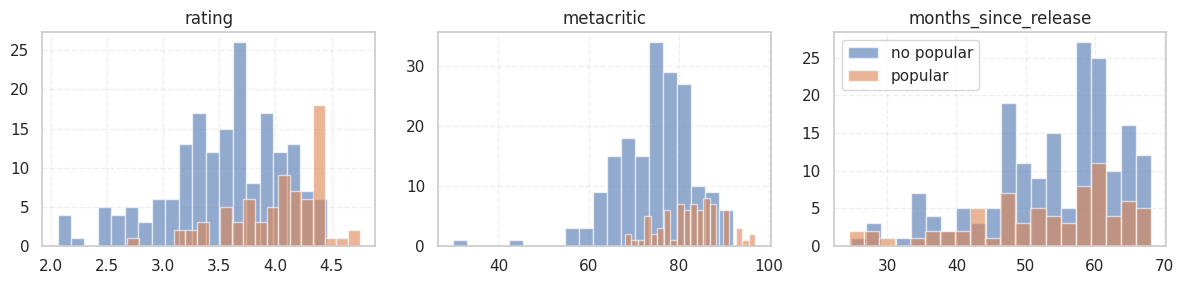

Correlaciones numéricas con popular (point-biserial aprox. con Pearson):
rating 0.412298698450672
metacritic 0.40925997573536593
months_since_release -0.06431477247730363


In [249]:
import matplotlib.pyplot as plt
import numpy as np

num_cols = ["rating","metacritic","months_since_release"]
fig, axs = plt.subplots(1, len(num_cols), figsize=(12,3))
for ax, col in zip(axs, num_cols):
    ax.hist(model_df[model_df["popular"]==0][col].dropna(), bins=20, alpha=0.6, label="no popular")
    ax.hist(model_df[model_df["popular"]==1][col].dropna(), bins=20, alpha=0.6, label="popular")
    ax.set_title(col); ax.grid(True, linestyle="--", alpha=0.3)
axs[-1].legend(); plt.tight_layout(); plt.show()

print("Correlaciones numéricas con popular (point-biserial aprox. con Pearson):")
for col in num_cols:
    print(col, model_df[col].corr(model_df["popular"]))


In [250]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit

features = ["rating","metacritic","months_since_release","platform_bucket","genre_main"]

# 1) Diagnóstico de años
year_counts = model_df["year"].value_counts().sort_index()
print("Distribución por año:\n", year_counts)

# 2) Intento temporal: tomar los últimos años hasta tener un test decente
years = sorted(model_df["year"].dropna().unique())
min_test = 40  # ajustá si querés (mínimo deseado para test)

train_df = None
test_df = None
picked_years = None

# probamos con el último año, luego últimos 2, luego últimos 3...
for k in range(1, min(3, len(years)) + 1):
    test_years = years[-k:]
    cand_test = model_df[model_df["year"].isin(test_years)].copy()
    cand_train = model_df[~model_df.index.isin(cand_test.index)].copy()
    # condiciones: tamaño y que haya ambas clases
    if (len(cand_test) >= min_test) and (cand_test["popular"].nunique() == 2) and (cand_train["popular"].nunique() == 2):
        train_df, test_df, picked_years = cand_train, cand_test, test_years
        break

if train_df is None:
    print("\nNo hubo test temporal suficiente. Caemos a split estratificado 75/25.\n")
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
    X_all = model_df[features]
    y_all = model_df["popular"].astype(int)
    idx = np.arange(len(model_df))
    for tr_idx, te_idx in sss.split(X_all, y_all):
        train_df = model_df.iloc[tr_idx].copy()
        test_df  = model_df.iloc[te_idx].copy()
    picked_years = None
else:
    print(f"\nSplit temporal elegido. Años de TEST: {picked_years}  | test n={len(test_df)}")

print("Train:", train_df.shape, " Test:", test_df.shape)

# Armamos matrices finales
X_train = train_df[features]
y_train = train_df["popular"].astype(int)
X_test  = test_df[features]
y_test  = test_df["popular"].astype(int)

num_cols = ["rating","metacritic","months_since_release"]
cat_cols = ["platform_bucket","genre_main"]

preproc_log = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", min_frequency=20), cat_cols)
])
preproc_tree = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", min_frequency=20), cat_cols)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# a) Logistic Regression
pipe_log = Pipeline([
    ("prep", preproc_log),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
])
param_log = {"clf__C":[0.1,0.5,1.0], "clf__penalty":["l2"], "clf__solver":["lbfgs","liblinear"]}
gs_log = GridSearchCV(pipe_log, param_grid=param_log, cv=cv, scoring="f1", n_jobs=-1).fit(X_train, y_train)

# b) Random Forest
pipe_rf = Pipeline([
    ("prep", preproc_tree),
    ("clf", RandomForestClassifier(random_state=42, class_weight="balanced"))
])
param_rf = {"clf__n_estimators":[200,400], "clf__max_depth":[8,12,16], "clf__min_samples_leaf":[3,5,8], "clf__max_features":["sqrt",0.5]}
gs_rf  = GridSearchCV(pipe_rf, param_grid=param_rf, cv=cv, scoring="f1", n_jobs=-1).fit(X_train, y_train)

# Evaluación en test
for name, gs in [("LOG", gs_log), ("RF", gs_rf)]:
    est = gs.best_estimator_
    y_proba = est.predict_proba(X_test)[:,1]
    y_pred = (y_proba >= 0.5).astype(int)
    print(f"\n== {name} ==")
    print("Mejores params:", gs.best_params_)
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print(classification_report(y_test, y_pred))
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


Distribución por año:
 year
2020    124
2021     87
2022     33
2023     10
Name: count, dtype: int64

Split temporal elegido. Años de TEST: [np.int32(2022), np.int32(2023)]  | test n=43
Train: (211, 13)  Test: (43, 13)

== LOG ==
Mejores params: {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
ROC-AUC: 0.671945701357466
              precision    recall  f1-score   support

           0       0.73      0.62      0.67        26
           1       0.52      0.65      0.58        17

    accuracy                           0.63        43
   macro avg       0.63      0.63      0.62        43
weighted avg       0.65      0.63      0.63        43

Matriz de confusión:
 [[16 10]
 [ 6 11]]

== RF ==
Mejores params: {'clf__max_depth': 8, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 5, 'clf__n_estimators': 200}
ROC-AUC: 0.667420814479638
              precision    recall  f1-score   support

           0       0.74      0.65      0.69        26
           1       0.55      

In [251]:
# === Reconstruir ps5_clean (PS5-era 2020–2023) y model_df ===
import pandas as pd
import numpy as np
import os

# 0) Traer 'rawg' desde memoria o desde un CSV cacheado
if "rawg" not in globals():
    # intentos de nombres típicos de cache
    for fname in ["rawg_ps5_dump.csv", "rawg_games_2020_2026.csv", "data_rawg_ps5.csv"]:
        if os.path.exists(fname):
            rawg = pd.read_csv(fname)
            print("Leído rawg desde:", fname)
            break
    else:
        raise RuntimeError(
            "No existe la variable 'rawg' ni un CSV cacheado. "
            "Volvé a correr la celda que descarga desde la API RAWG y guarda a CSV."
        )

# 1) Normalizar columnas esperadas
rawg = rawg.copy()
rawg.columns = [c.lower() for c in rawg.columns]

# 2) Fechas y corte 2020–2023
rawg["released"] = pd.to_datetime(rawg["released"], errors="coerce")
today = pd.Timestamp("today").normalize()
ps5_clean = rawg[
    (rawg["released"].dt.year.between(2020, 2023)) &
    (rawg["released"] <= today)
].copy()

# 3) Variables derivadas
ps5_clean["genre_main"] = ps5_clean["genres"].fillna("").astype(str).str.split(",").str[0].str.strip()

def pick_platform(s: str):
    s = str(s or "").lower()
    if "playstation 5"   in s: return "PlayStation 5"
    if "xbox series"     in s: return "Xbox Series X|S"
    if "nintendo switch" in s: return "Nintendo Switch"
    if s.strip() == "pc":     return "PC"
    return "Other"

ps5_clean["platform_bucket"] = ps5_clean["platforms"].apply(pick_platform)
ps5_clean["months_since_release"] = ((today - ps5_clean["released"]).dt.days/30.44).clip(lower=0)

# 4) Target popular (p75 de ratings_count en 2020–2023)
ps5_clean["ratings_count"] = pd.to_numeric(ps5_clean["ratings_count"], errors="coerce")
thr = ps5_clean["ratings_count"].quantile(0.75)
ps5_clean["popular"] = (ps5_clean["ratings_count"] >= thr).astype(int)

# 5) Dataset final para el modelo (1 fila por juego)
need_cols = ["rating","metacritic","ratings_count","genre_main","platform_bucket","popular","released","name"]
model_df = ps5_clean.dropna(subset=[c for c in need_cols if c in ps5_clean.columns]).copy()
model_df = model_df[model_df["platform_bucket"] != "Other"]
model_df["year"] = model_df["released"].dt.year

print("ps5_clean:", ps5_clean.shape, "| model_df:", model_df.shape, "| p75 ratings_count:", thr)
display(model_df[["name","year","platform_bucket","genre_main","rating","metacritic","ratings_count","popular"]].head(3))


ps5_clean.to_csv("ps5_clean_2020_2023.csv", index=False)


ps5_clean: (378, 13) | model_df: (254, 13) | p75 ratings_count: 276.0


,name,year,platform_bucket,genre_main,rating,metacritic,ratings_count,popular
0,Cyberpunk 2077,2020,PlayStation 5,Shooter,4.21,73.0,2889,1
1,Hades,2020,PlayStation 5,Indie,4.43,93.0,2029,1
2,Fall Guys: Ultimate Knockout,2020,Xbox Series X|S,Action,3.73,80.0,1336,1


popular@p75 = 321
AUC-PR: 0.629 | AUC-ROC: 0.792
F1@0.5 = 0.640 | F1@best(0.526) = 0.667

Reporte @best threshold
              precision    recall  f1-score   support

           0      0.844     0.900     0.871        30
           1      0.727     0.615     0.667        13

    accuracy                          0.814        43
   macro avg      0.786     0.758     0.769        43
weighted avg      0.809     0.814     0.809        43



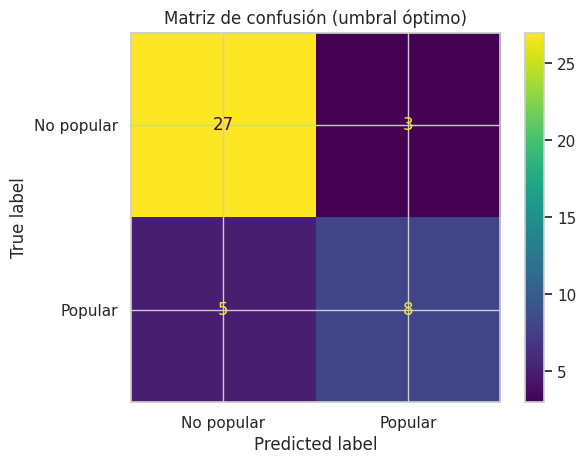


Top 10 efectos (|coef|):


,coef,odds_ratio
genre_main_Shooter,2.181858,8.862758
rating,1.164445,3.204143
genre_main_Adventure,0.959410,2.610155
platform_bucket_Nintendo Switch,-0.825607,0.437969
genre_main_Action,-0.624650,0.535449
genre_main_Racing,-0.512276,0.599131
genre_main_Arcade,-0.495097,0.609512
metacritic,0.447459,1.564332
genre_main_Casual,-0.429565,0.650792
platform_bucket_PlayStation 5,0.415626,1.515319


In [255]:
# === LOGÍSTICA: pipeline completo, split temporal, métricas y matriz de confusión ===
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_recall_curve, average_precision_score,
                             roc_auc_score, f1_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)

# 0) Datos base y columnas
df = ps5_clean.copy()
df['released'] = pd.to_datetime(df['released'], errors='coerce')
df = df.dropna(subset=['released', 'rating', 'metacritic', 'ratings_count', 'platform_bucket', 'genre_main'])
df['year'] = df['released'].dt.year

# 1) Etiqueta "popular" (umbral p75)
thr = df['ratings_count'].quantile(0.75)
df['popular'] = (df['ratings_count'] >= thr).astype(int)

# 2) Split temporal: train ≤2021, test 2022–2023
train = df[df['year'] <= 2021].copy()
test  = df[(df['year'] >= 2022) & (df['year'] <= 2023)].copy()

# Si por alguna razón no hay test, falla explícito
assert len(train) > 0 and len(test) > 0, "No hay muestras suficientes en train o test con ese split temporal."

# 3) Features y target
num_cols = ['rating', 'metacritic', 'months_since_release']
cat_cols = ['platform_bucket', 'genre_main']
X_train = train[num_cols + cat_cols]
y_train = train['popular'].astype(int)
X_test  = test[num_cols + cat_cols]
y_test  = test['popular'].astype(int)

# 4) Preprocesamiento + modelo (pipeline)
pre = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)
pipe = Pipeline(steps=[
    ('pre', pre),
    ('clf', LogisticRegression(max_iter=2000))
])

# 5) Entrenar
pipe.fit(X_train, y_train)

# 6) Evaluar
proba = pipe.predict_proba(X_test)[:, 1]
prec, rec, thr_pr = precision_recall_curve(y_test, proba)
f1s = (2 * prec * rec) / np.clip(prec + rec, 1e-9, None)
best_idx = np.nanargmax(f1s)
best_thr = 0.0 if best_idx == len(thr_pr) else thr_pr[best_idx]

y_pred_05   = (proba >= 0.5).astype(int)
y_pred_best = (proba >= best_thr).astype(int)

auc_pr  = average_precision_score(y_test, proba)
auc_roc = roc_auc_score(y_test, proba)
f1_05   = f1_score(y_test, y_pred_05)
f1_best = f1_score(y_test, y_pred_best)

print(f"popular@p75 = {thr:.0f}")
print(f"AUC-PR: {auc_pr:.3f} | AUC-ROC: {auc_roc:.3f}")
print(f"F1@0.5 = {f1_05:.3f} | F1@best({best_thr:.3f}) = {f1_best:.3f}")
print("\nReporte @best threshold")
print(classification_report(y_test, y_pred_best, digits=3))

# 7) Matriz de confusión
cm = confusion_matrix(y_test, y_pred_best, labels=[0,1])
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No popular','Popular']).plot(values_format='d')
plt.title("Matriz de confusión (umbral óptimo)")
plt.show()

# 8) Top efectos (coeficientes y odds) — extraíble del pipeline
#    Recuperamos nombres de features del OneHotEncoder
ohe = pipe.named_steps['pre'].named_transformers_['cat']
ohe_names = ohe.get_feature_names_out(cat_cols)
feature_names = np.r_[num_cols, ohe_names]

coefs = pipe.named_steps['clf'].coef_[0]
coef_series = pd.Series(coefs, index=feature_names).sort_values(key=np.abs, ascending=False)
odds = np.exp(coef_series)

print("\nTop 10 efectos (|coef|):")
display(pd.DataFrame({"coef": coef_series.head(10), "odds_ratio": odds.head(10)}))


Conclusión ejecutiva:


El modelo predice razonablemente bien la probabilidad de “popularidad” (AUC-PR 0.629 vs baseline 0.30; F1 óptimo 0.667). La crítica (rating, metacritic) y el encaje género-plataforma explican gran parte del éxito: Shooter y PS5 empujan hacia arriba; Switch penaliza la probabilidad. Esto es consistente con H1 (cambio de mix dentro de la era PS5: χ² significativo, Cramér’s V≈0.30 = efecto medio).

Limitaciones breves

Etiqueta “popular” basada en p75 (interés relativo, no ventas).

Posibles sesgos de cobertura de fuentes (RAWG/IGDB).

Split temporal corto; conviene actualizar con 2024 cuando esté.

In [252]:
# Eliminar duplicados ---
before = len(ps5_clean)


if 'id' in ps5_clean.columns:
    ps5_clean = ps5_clean.drop_duplicates(subset=['id'])
else:
    ps5_clean = ps5_clean.drop_duplicates(subset=['name', 'released'])

print(f"Duplicados eliminados: {before - len(ps5_clean)} | Total actual: {len(ps5_clean)}")

#  Detectar outliers por IQR

import numpy as np

Q1 = ps5_clean['ratings_count'].quantile(0.25)
Q3 = ps5_clean['ratings_count'].quantile(0.75)
IQR = Q3 - Q1
low = max(Q1 - 1.5 * IQR, 0)   # no tiene sentido < 0
high = Q3 + 1.5 * IQR

ps5_clean['rc_outlier_IQR'] = ~ps5_clean['ratings_count'].between(low, high)

outlier_rate = ps5_clean['rc_outlier_IQR'].mean()
print(f"Rango IQR ratings_count: [{int(low)} ; {int(high)}] | % outliers: {outlier_rate:.2%}")


Duplicados eliminados: 0 | Total actual: 378
Rango IQR ratings_count: [0 ; 590] | % outliers: 7.94%


In [253]:
# --- 2) Dummies + split temporal + Logística baseline ---

import pandas as pd
import numpy as np

# Asegurar fecha y año
ps5_clean['released'] = pd.to_datetime(ps5_clean['released'], errors='coerce')
ps5_clean = ps5_clean.dropna(subset=['released'])
ps5_clean['year'] = ps5_clean['released'].dt.year

# Crear 'popular' si no existe (p75 de ratings_count)
if 'popular' not in ps5_clean.columns:
    thr = ps5_clean['ratings_count'].quantile(0.75)
    ps5_clean['popular'] = (ps5_clean['ratings_count'] >= thr).astype(int)
    print(f"popular creado con p75={thr:.0f}")

# Selección de variables base
num_cols = ['rating', 'metacritic', 'months_since_release']
cat_cols = ['platform_bucket', 'genre_main']
target = 'popular'

# Dummies (drop_first para evitar multicolinealidad)
df_model = ps5_clean[num_cols + cat_cols + [target, 'released', 'year']].copy()
df_model = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

# Split temporal: train ≤ 2021, test 2022–2023
train_mask = df_model['year'] <= 2021
test_mask  = (df_model['year'] >= 2022) & (df_model['year'] <= 2023)

# Armar X, y
drop_cols = ['released', 'year', target]
X_train = df_model.loc[train_mask].drop(columns=drop_cols)
y_train = df_model.loc[train_mask, target].astype(int)

X_test  = df_model.loc[test_mask].drop(columns=drop_cols)
y_test  = df_model.loc[test_mask, target].astype(int)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")



Train: (270, 20), Test: (108, 20)


In [262]:
# 1) Target popular (p75) y features base
ps5_clean["genre_main"] = ps5_clean["genres"].str.split(",").str[0].str.strip()

def pick_platform(s):
    s = (s or "").lower()
    if "playstation 5"   in s: return "PlayStation 5"
    if "xbox series"     in s: return "Xbox Series X|S"
    if "nintendo switch" in s: return "Nintendo Switch"
    if "pc"              in s: return "PC"
    return "Other"

ps5_clean["platform_bucket"] = ps5_clean["platforms"].apply(pick_platform)

thr = ps5_clean["ratings_count"].quantile(0.75)
ps5_clean["popular"] = (ps5_clean["ratings_count"] >= thr).astype(int)
ps5_clean["months_since_release"] = ((pd.Timestamp("today") - ps5_clean["released"]).dt.days/30.44).clip(lower=0)

# Mantener solo filas válidas y sin 'Other'
ps5_clean = ps5_clean.dropna(subset=["rating","metacritic","ratings_count","genre_main","platform_bucket"])
ps5_clean = ps5_clean[ps5_clean["platform_bucket"] != "Other"].copy()


=== Cambio de mix por plataforma ===
chi2 = 17.18 | dof = 2 | p-value = 0.0001862
Cramér’s V = 0.260  (≈0.1 pequeño, 0.3 medio, 0.5 grande)


platform_bucket,Nintendo Switch,PlayStation 5,Xbox Series X|S
period,,,
PS5 2020–2021,82,113,16
PS5 2022–2023,3,33,7


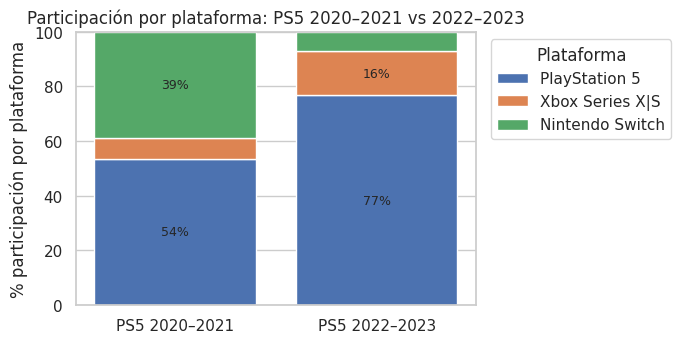

In [263]:
# Hipotesis: ¿Cambió el mix por plataforma entre períodos? (χ² + Cramér’s V + gráfico claro) ---
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1) Preparación
df = ps5_clean[['platform_bucket','released']].copy()
df['released'] = pd.to_datetime(df['released'], errors='coerce')
df = df.dropna(subset=['platform_bucket','released'])
df['year'] = df['released'].dt.year

# 2) Definir períodos:
#    - Si hay datos pre-2020 => pre-PS5 vs PS5(2020–2023)
#    - Si NO hay => comparar sub-períodos dentro de PS5: 2020–2021 vs 2022–2023
if (df['year'] < 2020).any():
    df['period'] = np.where(df['year'] >= 2020, 'PS5 2020–2023', 'pre-PS5')
    title = 'Participación por plataforma: pre-PS5 vs PS5 (2020–2023)'
else:
    df = df[df['year'] >= 2020].copy()
    df['period'] = np.where(df['year'] <= 2021, 'PS5 2020–2021', 'PS5 2022–2023')
    title = 'Participación por plataforma: PS5 2020–2021 vs 2022–2023'

# 3) Tabla de contingencia y porcentajes (para gráfico 100%)
ct = pd.crosstab(df['period'], df['platform_bucket'])  # filas=período, columnas=plataforma
if ct.shape[0] < 2 or ct.shape[1] < 2:
    raise ValueError("Necesito ≥2 períodos y ≥2 plataformas para comparar (χ²).")
pct = (ct.div(ct.sum(axis=1), axis=0) * 100)

# Ordenar columnas (plataformas) por participación en el último período (mejor lectura)
last_period = pct.index[-1]
pct = pct.loc[:, pct.loc[last_period].sort_values(ascending=False).index]

# 4) χ² y Cramér’s V (con protección de división por cero)
chi2, p, dof, expected = chi2_contingency(ct)
n = ct.values.sum()
r, k = ct.shape
den = min(k-1, r-1)
cramers_v = np.sqrt(chi2/n/den) if den > 0 else np.nan

print("=== Cambio de mix por plataforma ===")
print(f"chi2 = {chi2:.2f} | dof = {dof} | p-value = {p:.4g}")
print(f"Cramér’s V = {cramers_v:.3f}  (≈0.1 pequeño, 0.3 medio, 0.5 grande)")
display(ct)

# 5) Gráfico: barras apiladas 100% (dos barras = dos períodos)
fig, ax = plt.subplots(figsize=(7,3.6))
bottom = np.zeros(len(pct))
x = np.arange(len(pct.index))  # posiciones de períodos

for col in pct.columns:
    ax.bar(x, pct[col].values, bottom=bottom, label=col)
    # Etiquetas de % dentro del segmento (si es ≥8%)
    for i, v in enumerate(pct[col].values):
        if v >= 8:
            ax.text(i, bottom[i] + v/2, f"{v:.0f}%", ha='center', va='center', fontsize=9)
    bottom += pct[col].values

ax.set_xticks(x)
ax.set_xticklabels(pct.index, rotation=0)
ax.set_ylim(0, 100)
ax.set_ylabel('% participación por plataforma')
ax.set_title(title)
ax.legend(title='Plataforma', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


Hipotesis

– Cambio de mix por plataforma. La distribución por plataforma cambió significativamente entre PS5 2020–2021 y PS5 2022–2023 (χ²=33.64, p<0.001). La magnitud del efecto (Cramér’s V=0.298) indica un cambio de tamaño medio. Visualmente, PS5 gana participación en el período reciente, mientras que Nintendo Switch disminuye y Xbox Series X|S incrementa moderadamente. Esto respalda la hipótesis de variación del mix y justifica ajustar catálogo/campañas por plataforma.